# XGBoost

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

import xgboost as xgb

from matplotlib import pyplot as plt

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_full_strd.csv', index_col=0)
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


# Using full dataset

In [4]:
# train test split using the dataframe from above
state = 0

xtrain_xgb_full, xtest_xgb_full, ytrain_xgb_full, ytest_xgb_full = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain_xgb_full = ytrain_xgb_full.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# using GPU
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state,
                          eval_metric='rmse', gamma=0.001)

In [5]:
# using lists to store values for dataframe
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [5, 10, 50, 100, 250, 500, 1000]
maxdepth = [2, 3, 4, 5]
learningrate = np.linspace(0.08, 0.3, 6)


gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': learningrate}

# applying gridsearch using the n_folds value from above
gs_xgb_full = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_full.fit(xtrain_xgb_full, ytrain_xgb_full)

# setting up dataframe for results
train_scores.append(gs_xgb_full.best_estimator_.score(xtrain_xgb_full, ytrain_xgb_full))
test_scores.append(gs_xgb_full.best_estimator_.score(xtest_xgb_full, ytest_xgb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_full, ytrain_xgb_full, xtrain_xgb_full))
test_rmse.append(rmse(gs_xgb_full, ytest_xgb_full, xtest_xgb_full))

# add the best parameters to the df
best_par_list.append(gs_xgb_full.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 11min 38s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.973721,0.935078,0.064253,0.104893,-0.04064,0.124,2,500


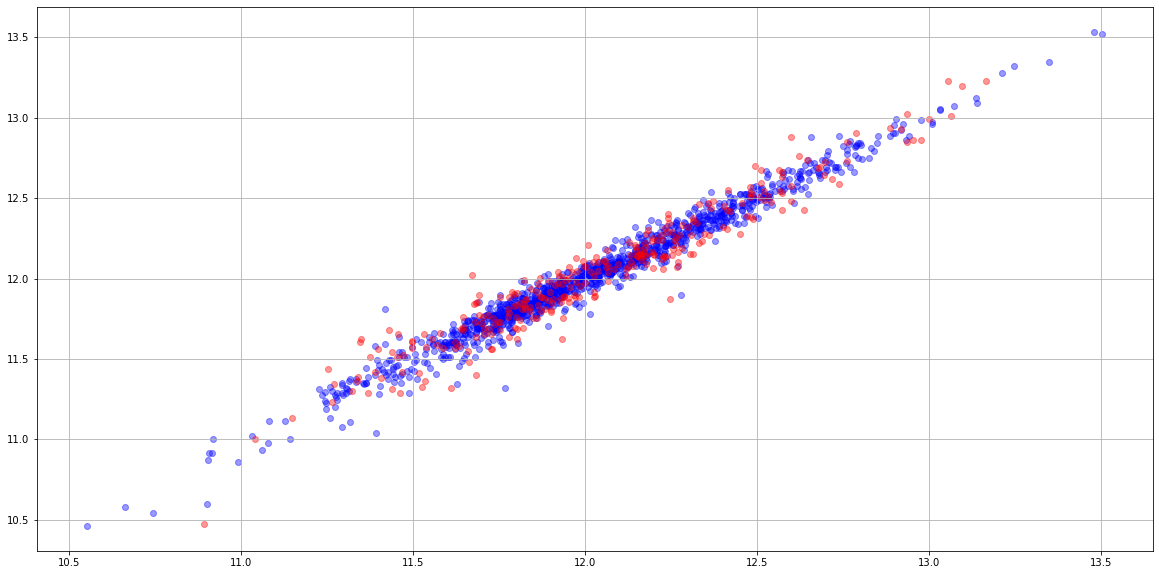

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_full.best_estimator_.predict(xtrain_xgb_full), ytrain_xgb_full, color='blue', alpha=0.4)
plt.scatter(gs_xgb_full.best_estimator_.predict(xtest_xgb_full), ytest_xgb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [7]:
# using lists to store values for dataframe
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [300, 400, 500, 600, 700, 800, 900]
maxdepth = [2, 3, 4]
learningrate = np.linspace(0.1, 0.16, 7)


gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': learningrate}

# applying gridsearch using the n_folds value from above
gs_xgb_full_1 = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_full_1.fit(xtrain_xgb_full, ytrain_xgb_full)

# setting up dataframe for results
train_scores.append(gs_xgb_full_1.best_estimator_.score(xtrain_xgb_full, ytrain_xgb_full))
test_scores.append(gs_xgb_full_1.best_estimator_.score(xtest_xgb_full, ytest_xgb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_full_1, ytrain_xgb_full, xtrain_xgb_full))
test_rmse.append(rmse(gs_xgb_full_1, ytest_xgb_full, xtest_xgb_full))

# add the best parameters to the df
best_par_list.append(gs_xgb_full_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 21min 51s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.969399,0.934901,0.069335,0.105036,-0.035701,0.12,2,400


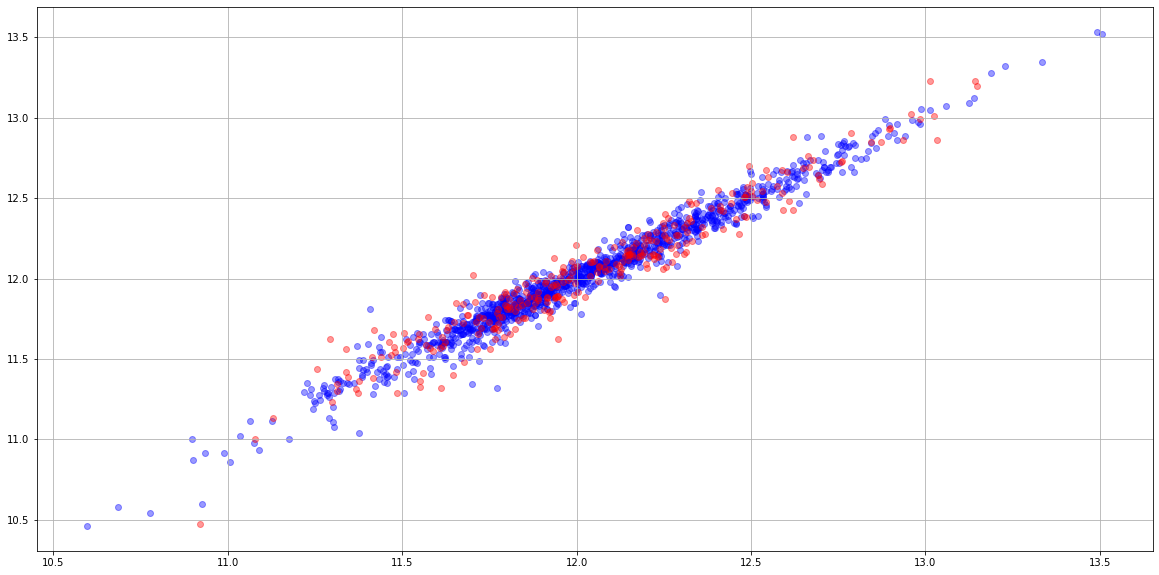

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_full_1.best_estimator_.predict(xtrain_xgb_full), ytrain_xgb_full, color='blue', alpha=0.4)
plt.scatter(gs_xgb_full_1.best_estimator_.predict(xtest_xgb_full), ytest_xgb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [9]:
# using lists to store values for dataframe
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [325, 350, 375, 400, 425, 450, 475]
maxdepth = [2, 3, 4]
learningrate = np.linspace(0.11, 0.13, 9)


gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': learningrate}

# applying gridsearch using the n_folds value from above
gs_xgb_full_2 = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_full_2.fit(xtrain_xgb_full, ytrain_xgb_full)

# setting up dataframe for results
train_scores.append(gs_xgb_full_2.best_estimator_.score(xtrain_xgb_full, ytrain_xgb_full))
test_scores.append(gs_xgb_full_2.best_estimator_.score(xtest_xgb_full, ytest_xgb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_full_2, ytrain_xgb_full, xtrain_xgb_full))
test_rmse.append(rmse(gs_xgb_full_2, ytest_xgb_full, xtest_xgb_full))

# add the best parameters to the df
best_par_list.append(gs_xgb_full_2.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 20min 32s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.97378,0.936517,0.06418,0.103725,-0.039544,0.125,2,475


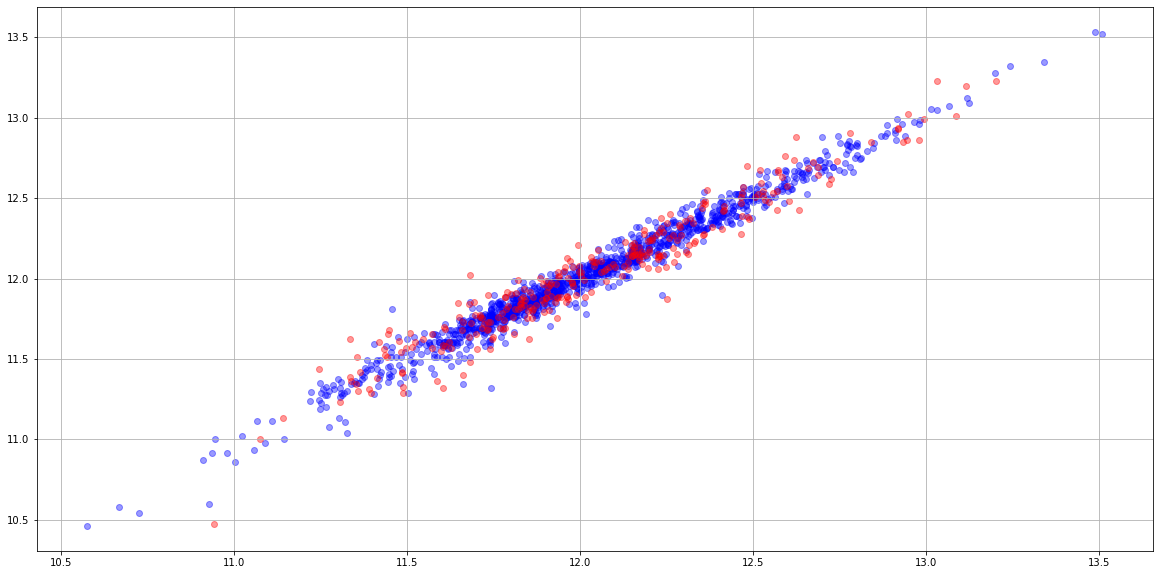

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_full_2.best_estimator_.predict(xtrain_xgb_full), ytrain_xgb_full, color='blue', alpha=0.4)
plt.scatter(gs_xgb_full_2.best_estimator_.predict(xtest_xgb_full), ytest_xgb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [11]:
# using lists to store values for dataframe
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [460, 470, 475, 480, 490]
maxdepth = [2, 3]
learningrate = np.linspace(0.12, 0.13, 11)


gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': learningrate}

# applying gridsearch using the n_folds value from above
gs_xgb_full_3 = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_full_3.fit(xtrain_xgb_full, ytrain_xgb_full)

# setting up dataframe for results
train_scores.append(gs_xgb_full_3.best_estimator_.score(xtrain_xgb_full, ytrain_xgb_full))
test_scores.append(gs_xgb_full_3.best_estimator_.score(xtest_xgb_full, ytest_xgb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_full_3, ytrain_xgb_full, xtrain_xgb_full))
test_rmse.append(rmse(gs_xgb_full_3, ytest_xgb_full, xtest_xgb_full))

# add the best parameters to the df
best_par_list.append(gs_xgb_full_3.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 13min 8s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.974437,0.936774,0.063371,0.103514,-0.040144,0.125,2,490


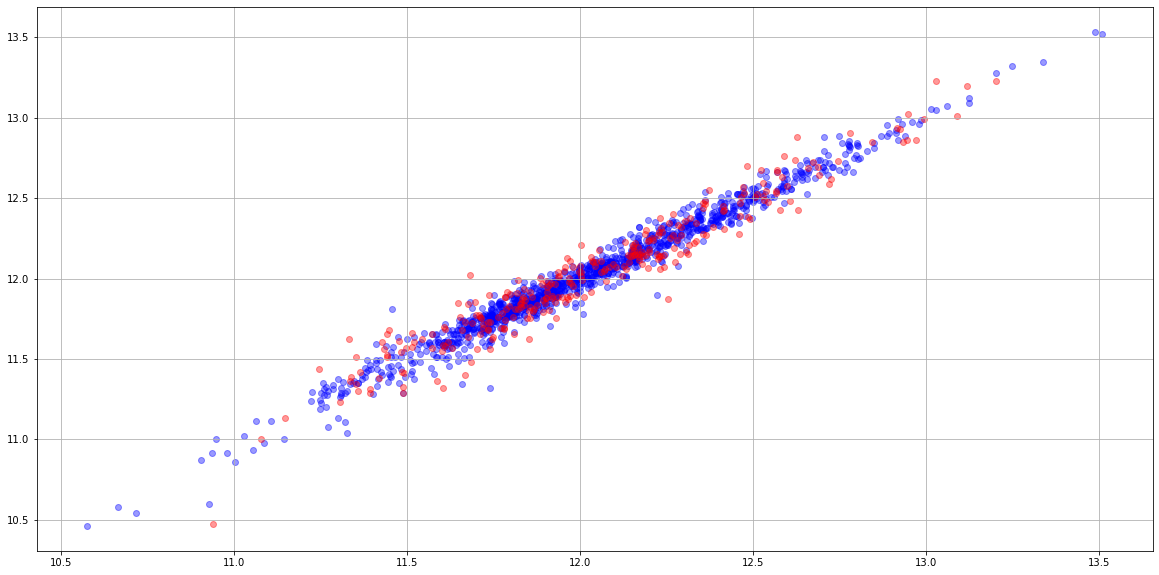

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_full_3.best_estimator_.predict(xtrain_xgb_full), ytrain_xgb_full, color='blue', alpha=0.4)
plt.scatter(gs_xgb_full_3.best_estimator_.predict(xtest_xgb_full), ytest_xgb_full, color='red', alpha=0.4)
plt.grid(which='both')

# Attempt with RFR reduced dataset

In [13]:
hp_rfr_fltr = pd.read_csv('..\hp_rfr_fltr.csv', index_col=0)
hp_rfr_fltr

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,YearBuilt,BsmtFinTotalSF,BsmtFinSF1,CentralAir_Y,OverallCond,LotArea,YrsRemodToSold,Fireplaces,LotFrontage,YearRemodAdd,2ndFlrSF,BsmtUnfSF,MSZoning_RM,GarageType_Detchd,GarageFinish_Unf,TotalBaths,GarageYrBlt,MasVnrArea,TotalPorchSF,MoSold,WoodDeckSF,OpenPorchSF,TotRmsAbvGrd,KitchenAbvGr,ExterCond_Fa,LotShape_Reg,GarageType_Attchd,BsmtQual_Gd,YrSold,SaleCondition_Normal,MSSubClass_30.0,KitchenQual_Gd,EnclosedPorch,BedroomAbvGr,KitchenQual_TA,MSZoning_RL,BsmtBaths,Neighborhood_IDOTRR,ExterQual_TA,Electrical_SBrkr,PavedDrive_Y,HeatingQC_Fa,Neighborhood_OldTown,HeatingQC_TA,FullBath,HalfBath,BsmtExposure_No,Functional_Typ,BsmtFinType1_GLQ,BsmtExposure_Gd,SaleCondition_Family,BsmtQual_TA,Condition1_Norm,RoofStyle_Hip,LandContour_Lvl,Neighborhood_NAmes,GarageFinish_RFn,ExterCond_TA,Neighborhood_Crawfor,Exterior1st_VinylSd,Exterior2nd_VinylSd,MSSubClass_60.0,LotConfig_Inside,Neighborhood_Edwards,RoofStyle_Gable,Foundation_PConc,FireplaceQu_Gd,BsmtFinType1_Unf,HeatingQC_Gd,ExterQual_Gd,ExterQual_Fa,Foundation_CBlock,BsmtFullBath,Exterior1st_Wd Sdng,Exterior1st_MetalSd,LandSlope_Mod,MSSubClass_50.0,ScreenPorch,MSSubClass_20.0,BsmtCond_TA,Heating_Grav,Exterior2nd_MetalSd,SaleType_WD,Neighborhood_NWAmes,Neighborhood_Sawyer,Exterior1st_BrkFace,Condition1_Feedr,BsmtFinType1_Rec,MasVnrType_BrkFace,FireplaceQu_TA,Porches,SaleType_New,Exterior2nd_Plywood,HouseStyle_2Story,SaleCondition_Partial,Decks,BsmtFinSF2,MiscVal,MasVnrType_Stone,FireplaceQu_Po,ExterCond_Gd,GarageType_CarPort,Exterior1st_HdBoard,GarageQual_Fa,GarageQual_TA,BsmtQual_Fa,HouseStyle_1Story,Neighborhood_CollgCr,Neighborhood_BrkSide,Exterior2nd_Wd Sdng,MSSubClass_80.0,BsmtFinType1_BLQ,BsmtHalfBath,KitchenQual_Fa,Neighborhood_NoRidge,Exterior1st_Plywood,Functional_Maj2,BsmtFinType2_BLQ,PavedDrive_P,Neighborhood_Somerst,Exterior2nd_HdBoard,LotConfig_CulDSac,BsmtExposure_Mn,BsmtUnfin,RoofStyle_Gambrel,MasVnrType_None,LandContour_HLS,Functional_Mod,Functional_Min2,2ndFlr,GarageCond_Fa,BsmtFinType1_LwQ,Neighborhood_ClearCr,Heating_GasA,MSSubClass_160.0,Exterior1st_CemntBd,GarageType_BuiltIn,Neighborhood_NridgHt,LowQualFinSF,MSSubClass_70.0,Condition2_Norm,Electrical_FuseF,MSSubClass_90.0,BldgType_Duplex,Exterior2nd_BrkFace,HouseStyle_SLvl,Exterior2nd_CmentBd,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_Mitchel,Neighborhood_MeadowV,BldgType_TwnhsE,GarageCond_TA,MSZoning_FV,BsmtFinType2_Unf,LandContour_Low,LotShape_IR2,Functional_Min1,Neighborhood_Timber,LowQualFin,HouseStyle_2.5Unf,Exterior2nd_Wd Shng,BsmtFinType2_LwQ,LotConfig_FR2,Exterior2nd_Stucco,Neighborhood_SawyerW,MSSubClass_120.0,Foundation_Slab,BldgType_Twnhs,Exterior1st_Stucco,BldgType_2fmCon,Neighborhood_SWISU,BsmtCond_Gd,MSSubClass_190.0,FireplaceQu_Fa,Condition1_PosA,LandSlope_Sev,MSZoning_RH,3SsnPorch,SaleType_ConLD,GarageType_Basment,BsmtFinType2_Rec,Condition1_RRAn,HouseStyle_SFoyer,GarageQual_Po,Heating_GasW,Neighborhood_NPkVill,Street_Pave,Neighborhood_Veenker,RoofMatl_Tar&Grv,Condition1_RRAe,LotShape_IR3,Exterior1st_WdShing,Condition1_PosN,HouseStyle_2.5Fin,Exterior1st_BrkComm,RoofMatl_WdShake,Exterior2nd_Brk Cmn,Neighborhood_BrDale,BsmtFinType2_GLQ,MSSubClass_85.0,MSSubClass_75.0,HouseStyle_1.5Unf,SaleCondition_Alloca,MSSubClass_45.0,GarageQual_Gd,SaleType_Oth,Foundation_Stone,GarageCond_Po,SaleType_ConLw,Exterior2nd_Stone,BsmtCond_Po,Heating_Wall,GarageCond_Gd
0,0.029344,0.028104,0.019815,0.027315,0.027731,0.018420,0.026608,0.027808,0.029998,1.0,0.023029,0.015398,0.004240,0.000000,0.023186,0.026427,0.040234,0.005464,0.0,0.0,0.0,0.035089,0.026512,0.024858,0.011747,0.007619,0.000000,0.019967,0.031232,0.024485,0.0,1.0,1.0,1.0,0.026192,1.0,0.0,1.0,0.000000,0.026364,0.0,1.0,0.038264,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.031599,0.041487,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.039163,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.031623,0.0,0.0,1.0,0.0,0.000000,0.

In [14]:
# train test split using the dataframe from above
state = 0

xtrain_xgb_rfr, xtest_xgb_rfr, ytrain_xgb_rfr, ytest_xgb_rfr = ms.train_test_split(hp_rfr_fltr,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain_xgb_rfr = ytrain_xgb_rfr.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# using GPU
xg_reg_rfr = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state,
                          eval_metric='rmse', gamma=0.001)

In [15]:
# using lists to store values for dataframe
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [5, 10, 50, 100, 250, 500, 1000]
maxdepth = [2, 3, 4, 5]
learningrate = np.linspace(0.08, 0.3, 6)


gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': learningrate}

# applying gridsearch using the n_folds value from above
gs_xgb_rfr = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_rfr.fit(xtrain_xgb_rfr, ytrain_xgb_rfr)

# setting up dataframe for results
train_scores.append(gs_xgb_rfr.best_estimator_.score(xtrain_xgb_rfr, ytrain_xgb_rfr))
test_scores.append(gs_xgb_rfr.best_estimator_.score(xtest_xgb_rfr, ytest_xgb_rfr))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_rfr, ytrain_xgb_rfr, xtrain_xgb_rfr))
test_rmse.append(rmse(gs_xgb_rfr, ytest_xgb_rfr, xtest_xgb_rfr))

# add the best parameters to the df
best_par_list.append(gs_xgb_rfr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 11min 25s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.980185,0.93803,0.055793,0.102481,-0.046689,0.08,2,1000


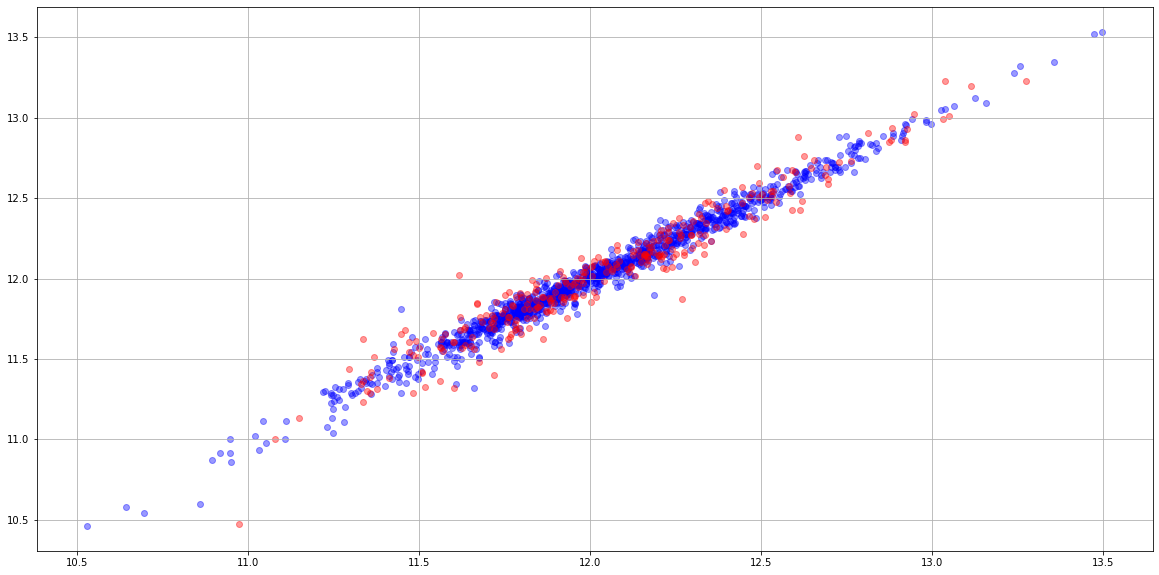

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_rfr.best_estimator_.predict(xtrain_xgb_rfr), ytrain_xgb_rfr, color='blue', alpha=0.4)
plt.scatter(gs_xgb_rfr.best_estimator_.predict(xtest_xgb_rfr), ytest_xgb_rfr, color='red', alpha=0.4)
plt.grid(which='both')